Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [1]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

In [38]:
df = flights %>%
    group_by(carrier)%>%
    count()%>%
    ungroup()%>%
    left_join(airlines)%>%
    arrange(n)%>%
    mutate(name = fct_inorder(name)%>%fct_lump(n=5)%>%fct_infreq()%>%fct_relevel('Other', after = Inf)%>% fct_rev()) 
    
df
    

Joining, by = "carrier"

Warning message:
“Unknown levels in `f`: Other”


carrier,n,name
<chr>,<int>,<fct>
OO,32,SkyWest Airlines Inc.
HA,342,Hawaiian Airlines Inc.
YV,601,Mesa Airlines Inc.
F9,685,Frontier Airlines Inc.
AS,714,Alaska Airlines Inc.
FL,3260,AirTran Airways Corporation
VX,5162,Virgin America
WN,12275,Southwest Airlines Co.
9E,18460,Endeavor Air Inc.


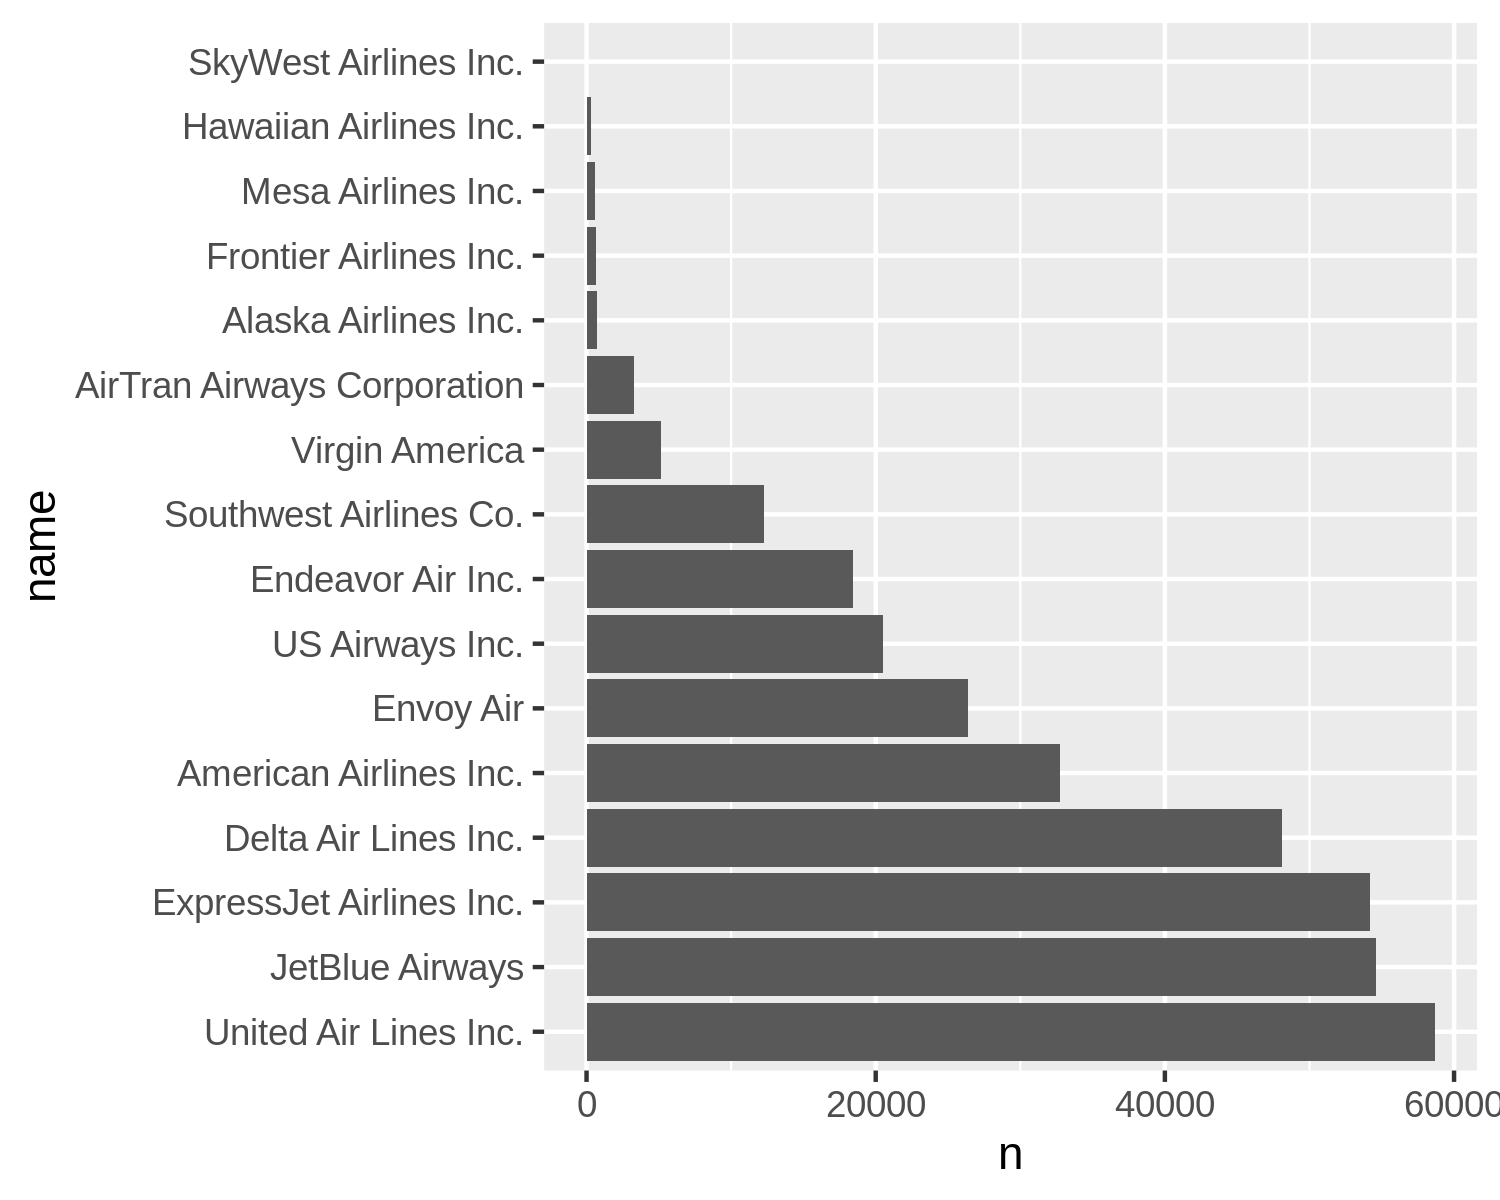

In [39]:
p = ggplot(df, aes(x = n, y = name))
p = p + geom_col()
p